<a href="https://colab.research.google.com/github/torchroh/Deep-learning/blob/main/D2L_2_5_Automatic_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.5 Automatic Differentiation


---

when we pass data through each successive function, the framework builds a computational graph(how each value depends on others)

automatic differentiation은 이 그래프를 역으로 실행함.

이러한 방식으로 체인 규칙을 적용하는 알고리즘을 backpropagation이라고 한다.

In [1]:
import torch

# 2.5.1 Simple Function

---
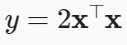를 미분하고자 한다.

시작: assign x an initial value


In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

x에 대하여 y의 gradient를 계산하기에 앞서, gradient를 저장할 장소가 필요하다.

딥러닝에서는 연속적으로 파생되는 계산을 하는 경우가 많기 때문에 매번 새로운 메모리를 할당하는 것은 주로 피한다.

scalar-valued function의 x(vector)에 대한 gradient는 vector-valued한 모양이다. (x와 같음)

In [4]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

x = tensor([0., 1., 2., 3.]) 였으므로

y = 2 * (0^2 + 1^2 + 2^2 + 3^2) = 28

In [17]:
y = 2 * torch.dot(x, x)
y, x

(tensor(28., grad_fn=<MulBackward0>),
 tensor([0., 1., 2., 3.], requires_grad=True))

In [18]:
y.backward()
x.grad

tensor([ 0., 16., 32., 48.])

??????? 나 이거 처음에는 0,4,8,12였다가 0,8,16,24였다가 지금은 0,16,32,48됨...

In [13]:
x.grad == 4 * x

tensor([ True, False, False, False])

In [19]:
x.grad.zero_()  # Reset the gradient 기울기 초기화
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

# 2.5.2 Backward of Non-Scalar Variables

---
most natural representation of the derivative of y(vector) with respect to a vextor x is a matrix called Jacobian.

It contains partial derivatives of each component of y with respect to each component of x.
